In [1]:
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np

import torch
import torch.utils
import torchvision
import torchvision.io

import _frameload


transform_forward = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(64),
    torchvision.transforms.Normalize([0.5] * 3, [0.5] * 3),
])
transform_backward = torchvision.transforms.Compose([
    torchvision.transforms.Normalize([-1.] * 3, [2.] * 3),
    torchvision.transforms.ToPILImage(),
])


In [2]:
images_train, labels_train, images_test, labels_test = \
    _frameload.main('train/')


In [3]:
class Frames(torch.utils.data.Dataset):
    def __init__(self, train, train_vs_test_files=((0, 1), (6, 7)),
                 transform=transform_forward, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform

        # get random indices
        if train is True:
            shuffled = np.random.permutation(len(images_train))
            self.images = images_train[shuffled].float()
            self.labels = labels_train[shuffled].float()
        else:
            shuffled = np.random.permutation(len(images_test))
            self.images = images_test[shuffled].float()
            self.labels = labels_test[shuffled].float()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label


In [4]:
dataset_train = Frames(
    train=True,
    transform=transform_forward
)
dataset_test = Frames(
    train=False,
    transform=transform_forward
)


In [5]:
print(type(dataset_train.images[0]))

print(dataset_train.images[-1])
print(dataset_train.images[0].shape)


<class 'torch.Tensor'>
tensor([[[0.6000, 0.5725, 0.5020,  ..., 0.2157, 0.2078, 0.2353],
         [0.6078, 0.6078, 0.5922,  ..., 0.2039, 0.2667, 0.4941],
         [0.5843, 0.5843, 0.6078,  ..., 0.2078, 0.5216, 0.6549],
         ...,
         [0.9294, 0.9255, 0.9294,  ..., 0.5294, 0.5294, 0.5333],
         [0.9333, 0.9333, 0.9294,  ..., 0.5255, 0.5255, 0.5333],
         [0.9333, 0.9333, 0.9333,  ..., 0.5255, 0.5255, 0.5255]],

        [[0.2863, 0.2588, 0.2157,  ..., 0.2118, 0.1961, 0.2235],
         [0.2824, 0.2824, 0.2824,  ..., 0.2039, 0.1882, 0.4157],
         [0.2706, 0.2706, 0.2824,  ..., 0.2039, 0.3686, 0.5020],
         ...,
         [0.5294, 0.5255, 0.5255,  ..., 0.5098, 0.5098, 0.5137],
         [0.5333, 0.5333, 0.5255,  ..., 0.5137, 0.5098, 0.5137],
         [0.5333, 0.5333, 0.5333,  ..., 0.5098, 0.5098, 0.5098]],

        [[0.3412, 0.3137, 0.2627,  ..., 0.2510, 0.2431, 0.2706],
         [0.3333, 0.3333, 0.3373,  ..., 0.2431, 0.2275, 0.4549],
         [0.3216, 0.3216, 0.3373,  

In [6]:
print(type(dataset_test.images[0]))

print(dataset_test.images[-1])
print(dataset_test.images[0].shape)


<class 'torch.Tensor'>
tensor([[[0.2667, 0.2627, 0.2627,  ..., 0.2627, 0.2627, 0.2627],
         [0.2627, 0.2588, 0.2588,  ..., 0.2588, 0.2627, 0.2588],
         [0.2588, 0.2588, 0.2549,  ..., 0.2588, 0.2549, 0.2549],
         ...,
         [0.4745, 0.4706, 0.4784,  ..., 0.4784, 0.4745, 0.4745],
         [0.4824, 0.4824, 0.4706,  ..., 0.4863, 0.4824, 0.4824],
         [0.4863, 0.4863, 0.4784,  ..., 0.4863, 0.4902, 0.4863]],

        [[0.3020, 0.2980, 0.2980,  ..., 0.2980, 0.3020, 0.3020],
         [0.2980, 0.2941, 0.2941,  ..., 0.2980, 0.3059, 0.3020],
         [0.3020, 0.3020, 0.2941,  ..., 0.2980, 0.3020, 0.3020],
         ...,
         [0.3098, 0.3059, 0.3098,  ..., 0.3137, 0.3098, 0.3098],
         [0.3176, 0.3176, 0.3176,  ..., 0.3216, 0.3176, 0.3176],
         [0.3216, 0.3216, 0.3098,  ..., 0.3216, 0.3255, 0.3216]],

        [[0.2314, 0.2275, 0.2275,  ..., 0.2275, 0.2314, 0.2314],
         [0.2235, 0.2196, 0.2196,  ..., 0.2235, 0.2314, 0.2275],
         [0.2275, 0.2275, 0.2196,  

img    43207	 shape torch.Size([3, 64, 64])   	 type photo
img    26397	 shape torch.Size([3, 64, 64])   	 type anime
img    38442	 shape torch.Size([3, 64, 64])   	 type photo
img    23248	 shape torch.Size([3, 64, 64])   	 type anime


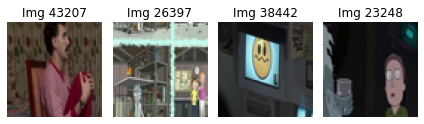

img    17769	 shape torch.Size([3, 64, 64])   	 type anime
img      629	 shape torch.Size([3, 64, 64])   	 type photo
img     9338	 shape torch.Size([3, 64, 64])   	 type photo
img    10451	 shape torch.Size([3, 64, 64])   	 type photo


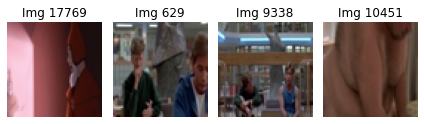

img    46580	 shape torch.Size([3, 64, 64])   	 type anime
img    35766	 shape torch.Size([3, 64, 64])   	 type anime
img     5975	 shape torch.Size([3, 64, 64])   	 type photo
img    54060	 shape torch.Size([3, 64, 64])   	 type anime


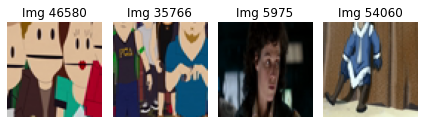

img    16971	 shape torch.Size([3, 64, 64])   	 type photo
img    16318	 shape torch.Size([3, 64, 64])   	 type anime
img    13787	 shape torch.Size([3, 64, 64])   	 type photo
img    12024	 shape torch.Size([3, 64, 64])   	 type anime


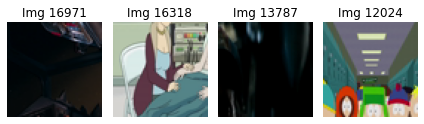

img    52615	 shape torch.Size([3, 64, 64])   	 type anime
img     6713	 shape torch.Size([3, 64, 64])   	 type photo
img    17568	 shape torch.Size([3, 64, 64])   	 type photo
img    48116	 shape torch.Size([3, 64, 64])   	 type photo


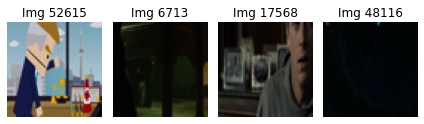

img     8681	 shape torch.Size([3, 64, 64])   	 type anime
img    17731	 shape torch.Size([3, 64, 64])   	 type photo
img     6210	 shape torch.Size([3, 64, 64])   	 type anime
img    17759	 shape torch.Size([3, 64, 64])   	 type anime


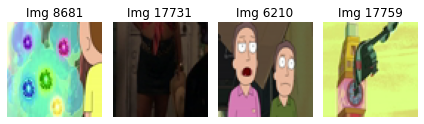

img    44399	 shape torch.Size([3, 64, 64])   	 type photo
img    53705	 shape torch.Size([3, 64, 64])   	 type photo
img    40610	 shape torch.Size([3, 64, 64])   	 type photo
img    35691	 shape torch.Size([3, 64, 64])   	 type photo


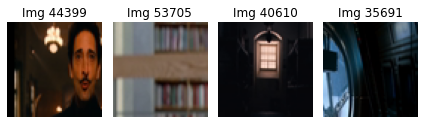

img    17403	 shape torch.Size([3, 64, 64])   	 type anime
img     6800	 shape torch.Size([3, 64, 64])   	 type anime
img     8328	 shape torch.Size([3, 64, 64])   	 type photo
img     4934	 shape torch.Size([3, 64, 64])   	 type anime


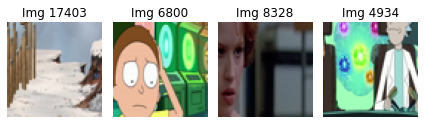

In [7]:
def showRandom(d):
    fig = plt.figure()
    for i, imgidx in enumerate(np.random.randint(0, len(d), 4)):
        image, label = d[imgidx]
        print(f'img {imgidx:8d}\t', f'shape {str(image.shape):26s}\t', 'type', 'anime' if label == 1 else 'photo')

        ax = plt.subplot(1, 4, i + 1)
        ax.imshow(transform_backward(image))
        ax.set_title(f'Img {imgidx}')
        ax.axis('off')

        plt.tight_layout()

    plt.show()

for _ in range(4):
    showRandom(dataset_train)
    showRandom(dataset_test)


In [8]:
print(f'Training N photo: {np.sum(dataset_train.labels.numpy() == 0):8d}')
print(f'Training N anime: {np.sum(dataset_train.labels.numpy() == 1):8d}')


Training N photo:    27305
Training N anime:    32695


In [80]:
class IsAnime(torch.nn.Module):
    def __init__(self):
        super(IsAnime, self).__init__()

        self.kernel = 5

        self.conv1 = torch.nn.Conv2d(3, 6, self.kernel)
        self.conv2 = torch.nn.Conv2d(6, 16, self.kernel)
        self.fc1 = torch.nn.Linear(2704, 768)
        self.fc2 = torch.nn.Linear(768, 128)
        self.fc3 = torch.nn.Linear(128, 1)
        
        # self.activation = torch.nn.Sigmoid()
        self.activation = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.pool = torch.nn.MaxPool2d(2)

    def forward(self, x):
        
        x.float()
        
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = torch.squeeze(x)

        x.float()
        
        return self.sigmoid(x)

net = IsAnime()
net.float()  # to be extra sure
net.cuda()

print(net)


IsAnime(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2704, out_features=768, bias=True)
  (fc2): Linear(in_features=768, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [81]:
import torchsummary
torchsummary.summary(net, (3, 64, 64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 60, 60]             456
              ReLU-2            [-1, 6, 60, 60]               0
         MaxPool2d-3            [-1, 6, 30, 30]               0
            Conv2d-4           [-1, 16, 26, 26]           2,416
              ReLU-5           [-1, 16, 26, 26]               0
         MaxPool2d-6           [-1, 16, 13, 13]               0
            Linear-7                  [-1, 768]       2,077,440
              ReLU-8                  [-1, 768]               0
            Linear-9                  [-1, 128]          98,432
             ReLU-10                  [-1, 128]               0
           Linear-11                    [-1, 1]             129
             ReLU-12                    [-1, 1]               0
          Sigmoid-13                       [-1]               0
Total params: 2,178,873
Trainable param

In [87]:
criterion = torch.nn.BCELoss()
# optimizer = torch.optim.LBFGS(net.parameters())
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [88]:
batch_size = int(1024 * 1)

# technically I already shuffled, but it probably doesn't matter, right?
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=False)


In [89]:
print('Training...')

for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader_train):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].cuda(), data[1].cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()            
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(f'Epoch {epoch + 1} loss: {running_loss / 2000:.3f}')


print('Finished training.')


Training...
Epoch 1 loss: 0.014
Epoch 2 loss: 0.014
Epoch 3 loss: 0.014


KeyboardInterrupt: 

In [85]:
correct = 0
total = 0

with torch.no_grad():
    for i, data in enumerate(loader_test):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        
        outputs = net(images)
        predictions = [1. if f >= 0.5 else 0. for f in outputs]
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct += 1
            total += 1
            
        if i > 10:
            break


# print accuracy for each class
print('correct', correct)
print('total', total)


correct 6815
total 12288


In [86]:
print(f'{correct / total * 100:03.1f}%')


55.5%
